In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('dados/electric-production.csv')

In [3]:
df.head()

,date,value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    397 non-null    object 
 1   value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df.index = pd.to_datetime(df['date'], format='%m-%d-%Y')

In [6]:
df.drop(columns=['date'], inplace=True)

In [7]:
df.head()

,value
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


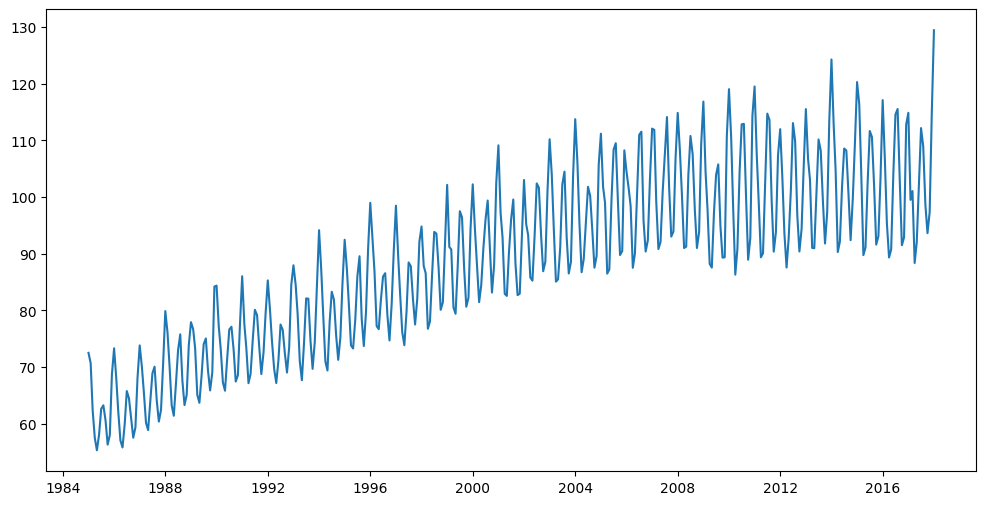

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df.value)
plt.show()

In [9]:
seasonal_decompose = seasonal_decompose(df)

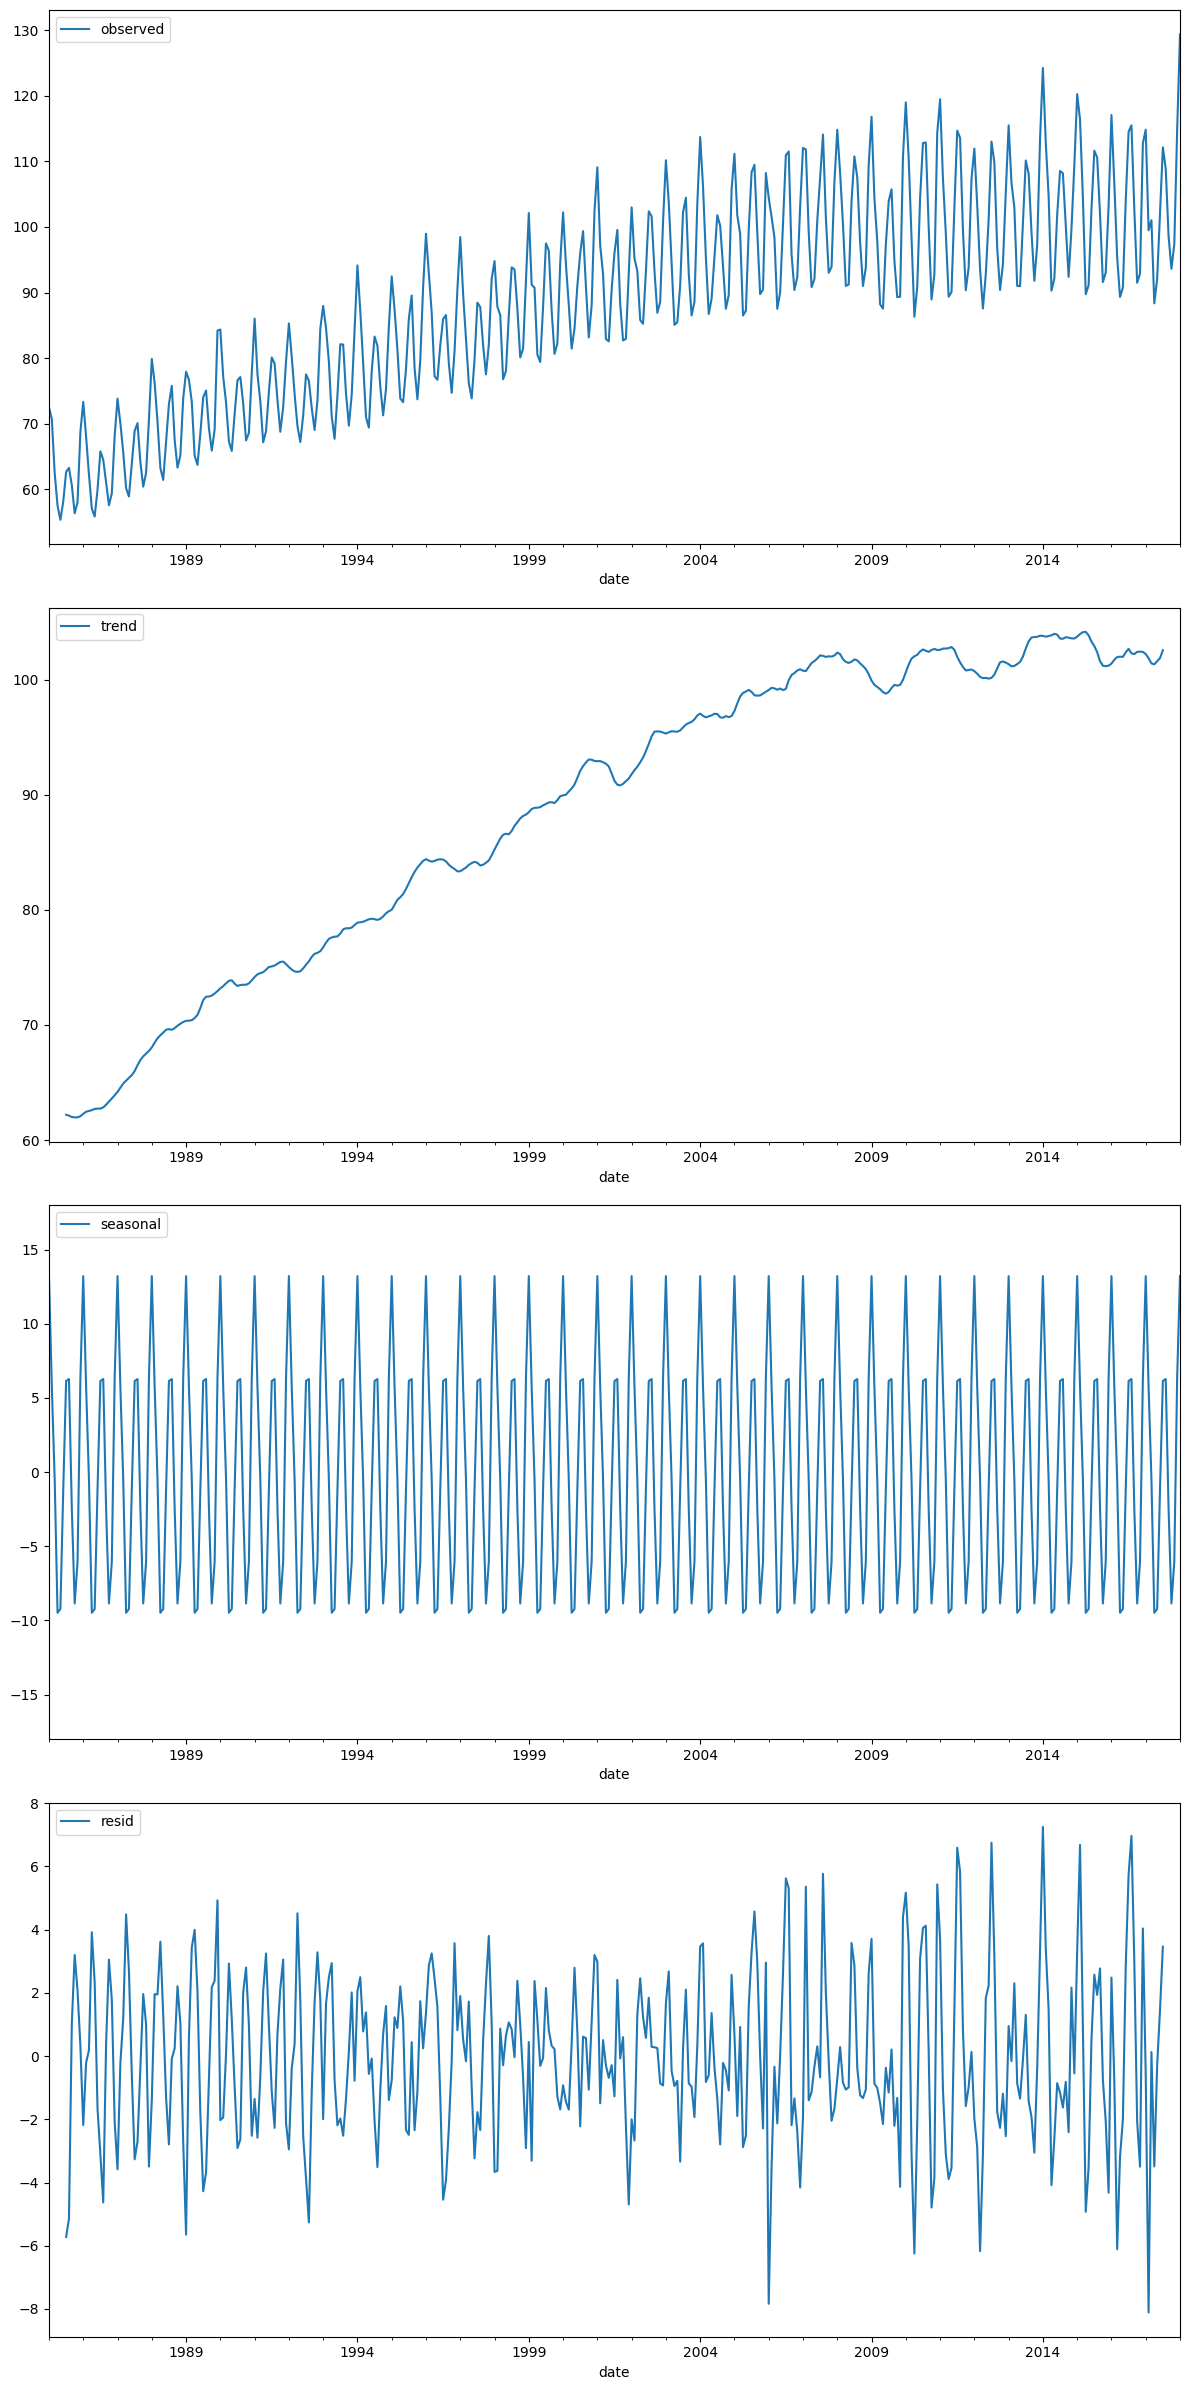

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,24))

seasonal_decompose.observed.plot(ax=ax1, label='observed')
ax1.legend(loc='upper left')

seasonal_decompose.trend.plot(ax=ax2, label='trend')
ax2.legend(loc='upper left')

seasonal_decompose.seasonal.plot(ax=ax3, label='seasonal')
ax3.legend(loc='upper left')
ax3.set_ylim(-18, 18)

seasonal_decompose.resid.plot(ax=ax4, label='resid')
ax4.legend(loc='upper left')

plt.tight_layout()
plt.show()